# Vector manipulation

## Transforming vectors

There are three main vector transformations:
* Scaling
* Translation
* Rotation

In [1]:
import numpy as np                     # Import numpy for array manipulation
import matplotlib.pyplot as plt        # Import matplotlib for charts
from utils import plot_vectors      # Function to plot vectors (arrows)

#### Example 1

In [2]:
R = np.array([[2, 0],
              [0, -2]])
x = np.array([[1, 1]])
y = np.dot(x, R) # dot product between a vector and a square matrix produces a rotation and a scaling of the original vector.
y


array([[ 2, -2]])

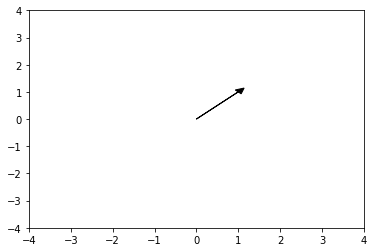

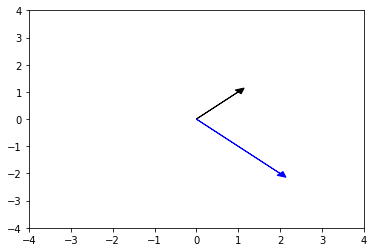

In [3]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

#### Example 2


In [4]:
angle = 100 * (np.pi / 180) #convert degrees to radians

Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

print(Ro)
x2 = np.array([2, 2]).reshape(1, -1) # make it a row vector
y2 = np.dot(x2, Ro)

print('Rotation matrix')
print(Ro)
print('\nRotated vector')
print(y2)

print('\n x2 norm', np.linalg.norm(x2))
print('\n y2 norm', np.linalg.norm(y2))
print('\n Rotation matrix norm', np.linalg.norm(Ro))

[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]
Rotation matrix
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Rotated vector
[[ 1.62231915 -2.31691186]]

 x2 norm 2.8284271247461903

 y2 norm 2.82842712474619

 Rotation matrix norm 1.414213562373095


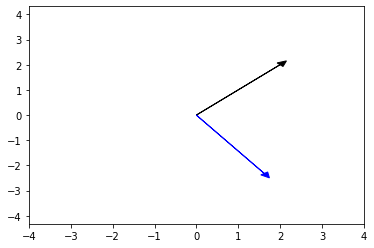

In [5]:
plot_vectors([x2, y2], fname='transform_02.svg')

## Frobenius Norm

$$\| \vec a \| = \sqrt {{\vec a} \cdot {\vec a}} $$

For a given $R^2$ matrix A, the frobenius norm is defined as:

$$\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}$$



In [6]:
A = np.array([[2, 2],
              [2, 2]])
A_squared = np.square(A)
print(A_squared)

A_Frobenius = np.sqrt(np.sum(A_squared))
print(A_Frobenius)


print('Frobenius norm of the Rotation matrix')
print(np.sqrt(np.sum(Ro * Ro)), '== ', np.linalg.norm(Ro))

[[4 4]
 [4 4]]
4.0
Frobenius norm of the Rotation matrix
1.414213562373095 ==  1.414213562373095


# Hash functions and multiplanes

* Basic hash tables
* Multiplanes
* Random planes

In [17]:
def side_of_plane(p,v):
    dot=np.dot(p, v.T)
    sign_of_dot=np.sign(dot)
    sign_of_dot_scalar=np.asscalar(sign_of_dot)
    
    return sign_of_dot_scalar

In [21]:
p=np.array([[1],[1]])

v1=np.array([[1],[1]])

v2=np.array([[2],[2]])
v3=np.array([[-1],[-1]])

print(np.dot(p,v1.T))
print(np.dot(p,v2.T))
print(np.dot(p,v3.T))


#print(side_of_plane(p,v1))
#print(side_of_plane(p,v2))
#print(side_of_plane(p,v3))

[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
[[-1 -1]
 [-1 -1]]


In [23]:
import numpy as np                # library for array and matrix manipulation
import pprint                     # utilities for console printing 
from utils import plot_vectors # helper function to plot vectors
import matplotlib.pyplot as plt   # visualization library

pp = pprint.PrettyPrinter(indent=4) # Instantiate a pretty printer

In [24]:
def basic_hash_table(value_l, n_buckets):
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)} # Initialize all the buckets in the hash table as empty lists

    for value in value_l:
        hash_value = hash_function(value,n_buckets) # Get the hash key for the given value
        hash_table[hash_value].append(value) # Add the element to the corresponding bucket
    
    return hash_table

In [25]:
value_l = [100, 10, 14, 17, 97] # Set of values to hash
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


## Planes



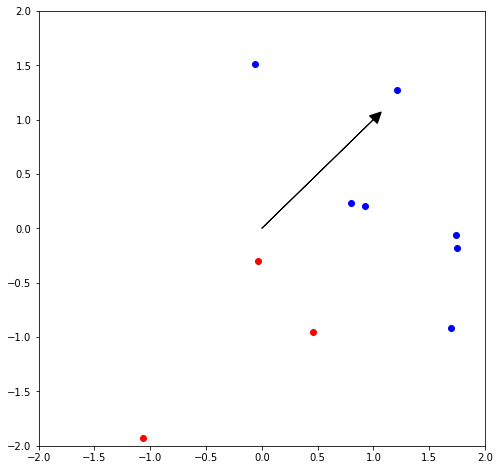

In [26]:
P = np.array([[1, 1]]) # Define a single plane. 
fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot

plot_vectors([P], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot  random points. 
for i in range(0, 10):
        v1 = np.array(np.random.uniform(-2, 2, 2)) # Get a pair of random numbers between -4 and 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) 
        
        # Color the points depending on the sign of the result of np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plot blue points
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plot red points

plt.show()


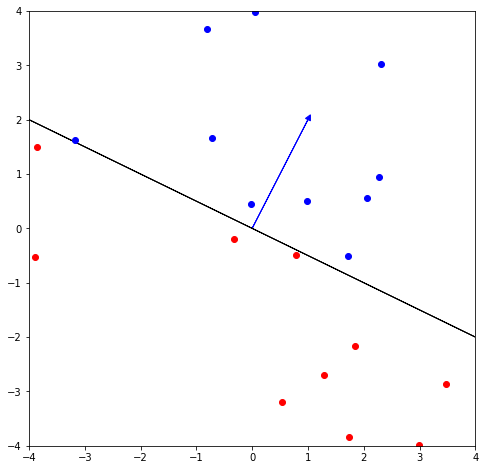

In [27]:
P = np.array([[1, 2]])  # Define a single plane. You may change the direction

# Get a new plane perpendicular to P. We use a rotation matrix
PT = np.dot([[0, 1], [-1, 0]], P.T).T  

fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot with custom size

plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot the plane P as a 2 vectors. 
# We scale by 2 just to get the arrows outside the current box
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)

# Plot 20 random points. 
for i in range(0, 20):
        v1 = np.array(np.random.uniform(-4, 4, 2)) # Get a pair of random numbers between -4 and 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) # Get the sign of the dot product with P
        # Color the points depending on the sign of the result of np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plot a blue point
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plot a red point

plt.show()



In [28]:
P = np.array([[1, 1]])      # Single plane
v1 = np.array([[1, 2]])     # Sample point 1
v2 = np.array([[-1, 1]])    # Sample point 2
v3 = np.array([[-2, -1]])   # Sample point 3

In [29]:
print(np.dot(P, v1.T))
print(np.dot(P, v2.T))
print(np.dot(P, v3.T))

[[3]]
[[0]]
[[-3]]


In [30]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Get the dot product P * v'
    sign_of_dot_product = np.sign(dotproduct) # The sign of the elements of the dotproduct matrix 
    sign_of_dot_product_scalar = sign_of_dot_product.item() # The value of the first item
    return sign_of_dot_product_scalar

In [31]:
print(side_of_plane(P, v1))
print(side_of_plane(P, v2))
print(side_of_plane(P, v3))

1
0
-1


## Hash Function with multiple planes

In [32]:
P1 = np.array([[1, 1]])   # First plane 2D
P2 = np.array([[-1, 1]])  # Second plane 2D
P3 = np.array([[-1, -1]]) # Third plane 2D
P_l = [P1, P2, P3]  # List of arrays. It is the multi plane

# Vector to search
v = np.array([[2, 2]])

In [33]:
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
    return hash_value

In [34]:
hash_multi_plane(P_l, v)

3

## Random Planes

In [35]:
np.random.seed(0)
num_dimensions = 2 # is 300 in assignment
num_planes = 3 # is 10 in assignment
random_planes_matrix = np.random.normal(
                       size=(num_planes,
                             num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [36]:
v = np.array([[2, 2]])

In [37]:
# Side of the plane function. The result is a matrix
def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct) # Get a boolean value telling if the value in the cell is positive or negative
    return sign_of_dot_product

In [38]:
sides_l = side_of_plane_matrix(
            random_planes_matrix, v)
sides_l

array([[1.],
       [1.],
       [1.]])

In [39]:
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v) # Get the side of planes for P and v
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item() # Get the value inside the matrix cell
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i # sum 2^i * hash_i
        
    return hash_value

In [40]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

## Document vectors

In [41]:
word_embedding = {"I": np.array([1,0,1]),
                   "love": np.array([-1,0,1]),
                   "learning": np.array([1,0,1])
                  }
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word,0)
    
print(document_embedding)

[1 0 3]
